# USO DE LAS ETAPAS PRIMARIAS DE LA METODOLOGIA CRISP-DM PARA EL ANALISIS DE DATOS DE LOS BIENES INMUEBLES EN LA CIUDAD DE BOGOTÁ




---








# 1. Entendimiento del negocio






## 1.1 Introdución
El mercado inmobiliario en Bogotá, capital de Colombia y una de las ciudades más importantes de América Latina, ha experimentado un crecimiento sostenido en los últimos años. Este crecimiento está impulsado por diversos factores, incluyendo la urbanización acelerada, la creciente demanda de viviendas y el desarrollo de proyectos comerciales. La ciudad ofrece una amplia gama de propiedades, desde apartamentos hasta casas y oficinas, con precios que varían significativamente según la ubicación y las características de la propiedad.

La demanda de viviendas en Bogotá ha sido históricamente alta, motivada por el crecimiento demográfico, la urbanización constante y el incremento en la población de clase media. Para abordar esta demanda, el gobierno ha implementado políticas que promueven la adquisición de viviendas, como programas de subsidios. Estas medidas han tenido un impacto positivo en el mercado inmobiliario y en el acceso a la vivienda para diversos segmentos de la población.

En este contexto, este proyecto de análisis de datos tiene como objetivo examinar y comprender el mercado inmobiliario en Bogotá. A través de un análisis detallado de datos, exploraremos tendencias en precios, preferencias de propiedad, ubicaciones más solicitadas y otros aspectos relevantes. Utilizando herramientas y técnicas de análisis de datos, buscamos proporcionar información valiosa que pueda servir como base para tomar decisiones informadas en el ámbito inmobiliario en la ciudad.



## 1.2 Objetivos de negocio y situación actual


El sector inmobiliario abarca la compra y venta de bienes inmuebles y se rige por la oferta y la demandada:
- Oferta: Bienes inmuebles promocionados en venta
- Demanda: Interes de un grupo de clientes para adquierir los bienes.

La relacion entre estas variables determina el precio de los productos, por lo que el mercado inmobiliario es altamente sensiblea a factores: politicos, economicos y sociales.

Algunos ejemplos comunes de tipos de inmuebles son:
*   Casa
*   Apartamento
*   Terreno
*   Edificios

Así mismo cada inmueble posee distintos usos, entre los cuales destacan:

*   Residencial   
*   Comercial
*   Industrial
*   Desarrollo
*   Inversión

En lo que concierne a Bogotá, la Unidad Administrativa especial de Catastro Digital (UADC), proporciona la siguiente información inmoviliaria para el año 2023:

*   Total de Inmuebles: La ciudad de Bogotá cuenta con un total de 2,776,362 inmuebles, con un valor estimado de 779.1 billones de pesos, representando un incremento del 6.8% en comparación con el año anterior.

*   Distribución Geográfica: Los nuevos predios se han concentrado de manera notable en las localidades de Suba (7,147 predios), Engativá (4,657 predios), Fontibón (4,385 predios) y Usaquén (3,764 predios)¹. Estos datos revelan patrones de desarrollo que pueden ser de gran interés estratégico.

*   Expansión de Área: Además, se han añadido 2.86 millones de metros cuadrados a la ciudad, lo que eleva el área total construida a 299 millones de metros cuadrados.

La magnitud de estos cambios en el censo inmobiliario de Bogotá es importante y subraya la necesidad de un análisis de datos detallado para comprender su impacto en el panorama urbano y económico.

















##1.3 Objetivo del proyecto

**1.3.1 Objetivo General:**


El objetivo general de este proyecto de análisis de datos es explorar el mercado inmobiliario en la ciudad de Bogotá, mediante el uso de datos relevantes, destacando tendencias y correlaciones significativas. Se hará énfasis en la visualización geoespacial para comprender la distribución espacial de las propiedades, así como en el análisis de la relación entre ubicación y precio de las mismas. El propósito es proporcionar insights valiosos y comprensibles que contribuyan a la toma de decisiones informadas para actores clave en el mercado inmobiliario de la ciudtá.




## 1.4 Planeación del proyecto

**1.3.2 Objetivos especificos:**


1.  Caracterizar los bienes inmuebles del DataFrame
2.  Identificar las tendencias geograficas presentes en los bienes inmuebles basandose en localidades o barrios.
3.  Desagregar las Características de los Inmuebles por Ubicación Geográfica
4.  Realizar un analisis de los factores que mas influyen en el precio de los inmuebles, ya sean de renta o venta.
5.  Analizar la demanda de los bienes raices en la ciudad con base en la localidad, identicando zonas de mayor demanda.

# 2. Entendimiento de los datos


## 2.1 Adquisición de los datos

Los datos utilizados en este proyecto fueron recopilados mediante un scraper que rastrea y actualiza los precios de venta de apartamentos en la base de datos. Estas bases de datos son de acceso público y están disponibles en las platadormas: Kaggle y GitHub.

* Kaggle: https://www.kaggle.com/datasets/erik172/bogota-apartments
* GitHub: https://github.com/builker-col/bogota-apartments

## 2.2 Integración de los datos

In [1]:
# Libraries
# Data processing
import pandas as pd
import numpy as np

# Data stats
from scipy import stats
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# Read apartments database into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/builker-col/bogota-apartments/master/data/processed/apartments.csv', delimiter=',')
apt = df

## 2.3 Análisis exploratorio de los datos: caracterización de los datos

### 2.3.1 Tipos de variables

In [3]:
apt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63245 entries, 0 to 63244
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   codigo                               63245 non-null  object 
 1   tipo_propiedad                       63245 non-null  object 
 2   tipo_operacion                       63245 non-null  object 
 3   precio_venta                         44405 non-null  float64
 4   precio_arriendo                      19702 non-null  float64
 5   area                                 63243 non-null  float64
 6   habitaciones                         63237 non-null  float64
 7   banos                                63239 non-null  float64
 8   administracion                       51342 non-null  float64
 9   parqueaderos                         63237 non-null  float64
 10  sector                               60238 non-null  object 
 11  estrato                     

In [4]:
apt.describe()

,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,estrato,longitud,latitud,...,jacuzzi,piso,closets,chimenea,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,distancia_estacion_tm_m,is_cerca_estacion_tm
count,4.440500e+04,1.970200e+04,63243.000000,63237.000000,63239.000000,5.134200e+04,63237.000000,63225.000000,63245.000000,63245.000000,...,63245.000000,35122.000000,23506.000000,63245.000000,63245.000000,63245.000000,63245.000000,63245.000000,63245.000000,63245.000000
mean,1.510209e+09,1.330095e+07,134.480490,2.591805,2.628441,3.571012e+06,1.590556,4.764302,-74.063698,4.686278,...,0.041821,9.353084,2.207649,0.331552,0.058471,0.295992,0.597312,0.389169,1293.977872,0.208048
std,3.769809e+10,3.011991e+08,752.129002,0.850579,1.165273,6.382093e+07,1.052490,1.259631,0.034651,0.039023,...,0.200183,51.754532,1.159691,0.470775,0.234634,0.456491,0.490443,0.487566,907.866126,0.405915
min,2.450000e+05,1.000000e+05,0.000000,1.000000,-3.000000,1.960000e+02,0.000000,0.000000,-74.215130,4.467270,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.810000,0.000000
25%,3.700000e+08,1.500000e+06,62.000000,2.000000,2.000000,3.000000e+05,1.000000,4.000000,-74.069000,4.661987,...,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,575.050000,0.000000
50%,6.100000e+08,2.900000e+06,94.000000,3.000000,2.000000,5.490000e+05,2.000000,5.000000,-74.052160,4.690000,...,0.000000,4.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1187.830000,0.000000
75%,1.185000e+09,6.000000e+06,160.000000,3.000000,3.000000,1.000000e+06,2.000000,6.000000,-74.043390,4.714606,...,0.000000,6.000000,3.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1734.270000,0.000000
max,4.250000e+12,2.550000e+10,113000.000000,8.000000,5.000000,3.800000e+09,4.000000,6.000000,-74.014000,4.821250,...,1.000000,2013.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9968.980000,1.000000


Se toman 5 registros a azar para conocer las distribución de la columnas. De tal manera, que se pueda obtener una percepción general de los datos.

In [5]:
apt.sample(5)

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
25440,12362-M4351966,APARTAMENTO,VENTA,1.240000e+09,NaN,180.0,4.0,3.0,550000.0,2.0,...,0,0,1,1,False,TEUSAQUILLO,CIUDAD SALITRE SURORIENTAL,Gran Estación,752.07,0
25219,920-42152107,APARTAMENTO,VENTA,1.500000e+09,NaN,356.0,4.0,5.0,1500000.0,3.0,...,0,0,1,0,False,USAQUEN,SANTA BARBARA CENTRAL III SECTOR,Pepe Sierra,2085.41,0
34929,11813-M4297747,APARTAMENTO,VENTA,2.996000e+08,NaN,54.0,3.0,2.0,340000.0,1.0,...,1,0,0,0,False,SUBA,PRADO PINZON,Calle 142,342.31,1
34607,3241-M2190149,APARTAMENTO,VENTA,6.800000e+08,NaN,149.0,3.0,4.0,650000.0,3.0,...,0,0,0,0,False,CHAPINERO,S.C. CHICO NORTE III SECTOR,Calle 100,131.06,1
27703,989-M3338456,APARTAMENTO,VENTA,1.200000e+09,NaN,72.0,3.0,5.0,1080000.0,2.0,...,0,0,0,0,False,USAQUEN,BOSQUE DE PINOS III,Calle 146,2917.54,0


Tambien se quiere conocer el numero de registro y la cantidad de columnas asociadas a estos

In [6]:
apt.shape

(63245, 38)

Tambien es necessario conocer todas las variables de los datos

In [7]:
apt.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')

Se muestra una tabla resumen de las variables de el dataframe


| Columna                              | Descripción                                               |
|--------------------------------------|-----------------------------------------------------------|
| codigo                               | Código único que identifica cada apartamento              |
| tipo_propiedad                       | Tipo de propiedad (apartamento, casa, etc.)               |
| tipo_operacion                       | Tipo de operación (venta, arriendo, etc.)                 |
| precio_venta                         | Precio de venta del apartamento COP                       |
| precio_arriendo                      | Precio de arriendo del apartamento COP                    |
| area                                 | Área del apartamento en metros cuadrados                  |
| habitaciones                         | Número de habitaciones del apartamento                    |
| banos                                | Número de baños del apartamento                           |
| administracion                       | Valor de la cuota de administración del apartamento       |
| parqueaderos                         | Número de parqueaderos disponibles                        |
| sector                               | Sector o zona en la que se encuentra el apartamento       |
| estrato                              | Estrato socioeconómico del apartamento                    |
| antiguedad                           | Antigüedad del apartamento en años                        |
| estado                               | Estado del apartamento (nuevo, usado)                     |
| longitud                             | Longitud geográfica del apartamento                       |
| latitud                              | Latitud geográfica del apartamento                        |
| descripcion                          | Descripción detallada del apartamento                     |
| datetime                             | Fecha y hora de extracción de los datos                   |
| jacuzzi                              | Indica si el apartamento cuenta con jacuzzi               |
| piso                                 | Número de piso en el que se encuentra el apartamento      |
| closets                              | Número de closets en el apartamento                       |
| chimenea                             | Indica si el apartamento cuenta con chimenea              |
| permite_mascotas                     | Indica si se permiten mascotas en el apartamento          |
| gimnasio                             | Indica si el apartamento cuenta con gimnasio              |
| ascensor                             | Indica si el edificio cuenta con ascensor                 |
| conjunto_cerrado                     | Indica si el apartamento se encuentra en conjunto cerrado |
| coords_modified                      | Coordenadas modificadas del apartamento                   |
| localidad                            | Localidad en la que se encuentra el apartamento           |
| barrio                               | Barrio en el que se encuentra el apartamento              |
| estacion_tm_cercana                  | Nombre de la estacion de transporte masivo mas cercana    |
| distancia_estacion_tm_m              | Distancia a la estación de transporte masivo más cercana  |
| is_cerca_estacion_tm                    | Indica si está cerca de una estación de transporte masivo |
| website                              | Sitio web relacionado a la propiedad                      |
| compañia                             | Compañía o agencia responsable de la propiedad            |
| fecha_actualizacion_precio_venta     | Fecha de actualización del precio de venta (scrapeado)    |
| precio_venta_anterior                | Precio de venta anterior de la propiedad COP              |
| fecha_actualizacion_precio_arriendo  | Fecha de actualización del precio de arriendo (scrapeado) |
| precio_arriendo_anterior             | Precio de arriendo anterior de la propiedad COP           |

### 2.3.2 Variables con valores faltanes

In [8]:
conteo_nan_por_columna = apt.isna().sum()

# Si deseas contar los NaN y expresarlos como porcentaje en lugar de número absoluto:
porcentaje_nan_por_columna = (apt.isna().mean() * 100).round(2)

# Crear un nuevo DataFrame o serie para mostrar los resultados
resultado = pd.DataFrame({'Total de NaN': conteo_nan_por_columna, 'Porcentaje de NaN': porcentaje_nan_por_columna})
#resultado = resultado['Total de NaN'].sort_values(ascending = False)
resultado_1 = resultado['Total de NaN'].sort_values(ascending = False)
# Mostrar el resultado
print(resultado_1)

precio_arriendo_anterior               61374
precio_venta_anterior                  61354
fecha_actualizacion_precio_arriendo    61351
fecha_actualizacion_precio_venta       61316
precio_arriendo                        43543
closets                                39739
piso                                   28123
precio_venta                           18840
compañia                               12668
administracion                         11903
sector                                  3007
estado                                  1144
barrio                                   313
antiguedad                                28
estrato                                   20
descripcion                                9
parqueaderos                               8
habitaciones                               8
banos                                      6
area                                       2
ascensor                                   0
estacion_tm_cercana                        0
conjunto_c

### 2.3.3 Variables categoricas y numéricas

Se realiza una clasifiación de las variables en:
* Variables numericas
* Variables categóricas

In [9]:
# Numeric variables
var_numeric = (['precio_venta',
                'precio_arriendo',
                'area',
                'habitaciones',
                'banos',
                'administracion',
                'parqueaderos',
                'longitud',
                'latitud',
                'fechas',
                'precio_arriendo_anterior',
                'piso',
                'closets',
                'distancia_estacion_tm_m'])

In [10]:
# Categorical variables
var_categorical = (['codigo',
                    'tipo_propiedad',
                    'tipo_operacion',
                    'sector',
                    'estrato',
                    'antiguedad',
                    'estado',
                    'descripcion',
                    'datetime',
                    'website',
                    'compañia',
                    'jacuzzi',
                    'closets',
                    'chimenea',
                    'permite_mascotas',
                    'gimnasio',
                    'ascensor',
                    'conjunto_cerrado',
                    'coords_modified',
                    'localidad',
                    'barrio',
                    'estacion_tm_cercana',
                    'is_cerca_estacion_tm'])

### 2.3.4 Exploración de los datos

Se precisa ver los valores mas frecuentes en algunas de las mas importantes variables categoricas

In [11]:
estrato = (
    apt
    .estrato
    .value_counts()
)
estrato

6.0    25949
4.0    13540
5.0    11592
3.0     9405
2.0     2495
1.0      204
0.0       40
Name: estrato, dtype: int64

In [12]:
operacion = (
    apt
    .tipo_operacion
    .value_counts()
)
operacion

VENTA               43755
ARRIENDO            19075
VENTA Y ARRIENDO      415
Name: tipo_operacion, dtype: int64

In [13]:
venta_localidad = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .localidad
    .value_counts()
)
venta_localidad

USAQUEN               16477
CHAPINERO             10868
SUBA                   7837
KENNEDY                1681
FONTIBON               1521
ENGATIVA               1291
TEUSAQUILLO            1193
SANTA FE                630
BOSA                    564
BARRIOS UNIDOS          471
CIUDAD BOLIVAR          263
PUENTE ARANDA           252
LOS MARTIRES            187
USME                    133
RAFAEL URIBE URIBE      117
CANDELARIA               89
ANTONIO NARINO           72
SAN CRISTOBAL            69
TUNJUELITO               40
Name: localidad, dtype: int64

In [14]:
arriendo_localidad = (
    apt
    .query("tipo_operacion == 'ARRIENDO' or tipo_operacion == 'VENTA O ARRIENDO'")
    .localidad
    .value_counts()
)
arriendo_localidad

CHAPINERO             6115
USAQUEN               5868
SUBA                  2247
ENGATIVA               710
KENNEDY                664
FONTIBON               641
TEUSAQUILLO            618
SANTA FE               541
PUENTE ARANDA          410
BARRIOS UNIDOS         348
BOSA                   162
LOS MARTIRES           156
CIUDAD BOLIVAR         153
RAFAEL URIBE URIBE     127
CANDELARIA              87
SAN CRISTOBAL           86
ANTONIO NARINO          81
TUNJUELITO              43
USME                    18
Name: localidad, dtype: int64

In [15]:
sector = (
    apt
    .sector
    .value_counts()
)
sector

CHICO                   13653
SANTA BARBARA           10577
COUNTRY                  5372
COLINA Y ALREDEDORES     4518
CEDRITOS                 4025
                        ...  
RESTREPO                    1
VENECIA                     1
SAN RAFAEL                  1
LOS ALCAZARES               1
TEUSAQUILLO                 1
Name: sector, Length: 102, dtype: int64

In [16]:
antiguedad = (
    apt
    .antiguedad
    .value_counts()
)
antiguedad

MAS DE 20 ANOS        21452
ENTRE 10 Y 20 ANOS    16312
ENTRE 0 Y 5 ANOS      11769
ENTRE 5 Y 10 ANOS     11419
REMODELADO             2265
Name: antiguedad, dtype: int64

In [17]:
compania = (
    apt
    .compañia
    .value_counts()
)
compania

ENGEL & VOLKERS                 1113
INMOBILIARIA BOGOTA             1093
JULIO CORREDOR Y CIA. LTDA.     1043
HOUM                             949
PADS                             949
                                ... 
INMOBILIARIA ALFA FINCA RAIZ       1
CENTRO EMPRESARIAL UNICENTRO       1
CASA LUBER INMOBILIARIA            1
GESTIONES AL CUADRADO              1
DIANA HELENA ESPINOSA MADRID       1
Name: compañia, Length: 807, dtype: int64

In [18]:
tipo = (
    apt
    .tipo_propiedad
    .value_counts()
)
tipo

APARTAMENTO                  63139
CASA CON CONJUNTO CERRADO       79
CASA                            27
Name: tipo_propiedad, dtype: int64

## 2.4 Análisis exploratorio de datos: descripción con estadistica descriptiva

Como se plantea desde un inicio el objetivo del proyecto se enfoca en la visualización geoespacial para comprender la distribución espacial de los inmuebles y su relación con el valor inmobiliario. Por esta razon, se agrupan los inmuebles por localidad y se analizan variables numericas relevantes.

### 2.4.1 Medidas de posición

In [19]:
# PRECIO VENTA
precio_venta_pos = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': ['mean',
                         'median',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75),]})
)

# Format data as money
precio_venta_pos = (
    precio_venta_pos
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_venta_pos.columns = ('promedio', 'mediana', 'percentil 25', 'percentil 75')

precio_venta_pos.sort_values(by='promedio', ascending=False)

,promedio,mediana,percentil 25,percentil 75
localidad,,,,
SUBA,"$591,987,835.29","$470,000,000.00","$321,200,000.00","$690,000,000.00"
TEUSAQUILLO,"$565,432,837.79","$520,000,000.00","$400,000,000.00","$650,000,000.00"
CANDELARIA,"$540,971,548.42","$400,000,000.00","$270,000,000.00","$490,000,000.00"
BARRIOS UNIDOS,"$508,897,523.24","$460,000,000.00","$368,999,999.50","$550,000,000.00"
FONTIBON,"$481,779,442.36","$390,431,000.00","$250,000,000.00","$559,000,000.00"
PUENTE ARANDA,"$368,460,908.73","$350,000,000.00","$230,000,000.00","$450,000,000.00"
ANTONIO NARINO,"$323,473,611.11","$260,000,000.00","$223,750,000.00","$330,000,000.00"
ENGATIVA,"$311,125,629.63","$280,000,000.00","$228,000,000.00","$349,500,000.00"
TUNJUELITO,"$300,575,000.00","$222,500,000.00","$175,000,000.00","$265,000,000.00"


In [20]:
# PRECIO ARRIENDO
precio_arriendo_pos = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': ['mean',
                         'median',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75),]})
)

# Format data as money
precio_arriendo_pos = (
    precio_arriendo_pos
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_arriendo_pos.columns = ('promedio', 'mediana', 'percentil 25', 'percentil 75')

precio_arriendo_pos.sort_values(by='promedio', ascending=False)

,promedio,mediana,percentil 25,percentil 75
localidad,,,,
ANTONIO NARINO,$nan,$nan,$nan,$nan
CIUDAD BOLIVAR,$nan,$nan,$nan,$nan
SAN CRISTOBAL,$nan,$nan,$nan,$nan
RAFAEL URIBE URIBE,$nan,$nan,$nan,$nan
LOS MARTIRES,$nan,$nan,$nan,$nan
CANDELARIA,$nan,$nan,$nan,$nan
USME,$nan,$nan,$nan,$nan
ENGATIVA,"$85,392,727.27","$1,200,000.00","$800,000.00","$1,525,000.00"
SANTA FE,"$826,350,000.00","$826,350,000.00","$414,525,000.00","$1,238,175,000.00"


*NOTA: SE OBSERVA QUE SE ENCUENTRA DATOS FALTANTES PARA ALGUNAS DE LAS LOCALIDADES. SE DEBE TENER MUY ENCUENTA PARA LIMPIAR LOS DATOS*

In [21]:
# AREA VENTA
area_venta_pos = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'area': ['mean',
                         'median',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75),]})
)

# Change column names
area_venta_pos.columns = ('promedio', 'mediana', 'percentil 25', 'percentil 75')

area_venta_pos.sort_values(by='promedio', ascending=False)

,promedio,mediana,percentil 25,percentil 75
localidad,,,,
CHAPINERO,191.556459,165.00,102.085,242.0000
TEUSAQUILLO,186.942666,89.00,64.000,112.0000
USAQUEN,142.176216,113.00,79.000,172.0000
FONTIBON,136.387212,68.44,55.000,87.0000
SUBA,109.215011,87.18,67.000,122.0000
KENNEDY,105.898334,55.00,47.000,67.0000
BARRIOS UNIDOS,90.003758,82.00,64.000,103.0000
SANTA FE,77.906349,55.00,45.000,86.5000
PUENTE ARANDA,71.724405,66.10,53.255,78.2250


In [22]:
# AREA ARRIENDO
area_venta_pos = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'area': ['mean',
                         'median',
                         lambda x: x.quantile(0.25),
                         lambda x: x.quantile(0.75),]})
)

# Change column names
area_venta_pos.columns = ('promedio', 'mediana', 'percentil 25', 'percentil 75')

area_venta_pos.sort_values(by='promedio', ascending=False)

,promedio,mediana,percentil 25,percentil 75
localidad,,,,
SANTA FE,200.254122,40.000,28.000,64.000
CHAPINERO,157.756444,128.270,70.000,212.000
USAQUEN,121.010999,90.000,62.000,150.000
TUNJUELITO,99.745581,51.000,47.000,58.500
SUBA,86.681424,69.970,52.000,100.000
BARRIOS UNIDOS,73.276782,62.500,45.000,90.000
ENGATIVA,68.873268,57.205,48.000,70.000
FONTIBON,65.055039,56.000,45.000,72.000
PUENTE ARANDA,64.171732,60.000,47.000,79.750


### 2.4.2 Medidas de forma

In [23]:
# FORMA VENTA
precio_venta_for = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': [
            lambda x: x.kurtosis(),
            lambda x: x.skew(),
        ]
        })
)

# Change column names
precio_venta_for.columns = ('curtosis', 'asimetria',)

precio_venta_for.sort_values(by='curtosis', ascending=False)

,curtosis,asimetria
localidad,,
USAQUEN,5498.606500,72.501466
CHAPINERO,2209.561370,45.368644
SANTA FE,629.543675,25.086287
BOSA,563.999172,23.748658
KENNEDY,97.516548,5.481665
ANTONIO NARINO,61.549967,7.579317
ENGATIVA,59.513326,5.837118
TEUSAQUILLO,50.212537,4.617949
CANDELARIA,45.725952,6.302717


In [24]:
# FORMA ARRIENDO
precio_venta_for = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': [
            lambda x: x.kurtosis(),
            lambda x: x.skew(),
        ]
        })
)

# Change column names
precio_venta_for.columns = ('curtosis', 'asimetria',)

precio_venta_for.sort_values(by='curtosis', ascending=False)

,curtosis,asimetria
localidad,,
USAQUEN,16.854851,3.521459
SUBA,14.952775,3.430719
ENGATIVA,8.671118,2.909085
CHAPINERO,3.988002,1.801141
TEUSAQUILLO,0.979009,1.041774
KENNEDY,-2.278682,-0.038397
ANTONIO NARINO,NaN,NaN
BARRIOS UNIDOS,NaN,NaN
BOSA,NaN,NaN


### 2.4.3 Medidas de disperción

In [25]:
# VENTAS DISPERCION
precio_venta_dis = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': ['std',
                         'var',
                         'min',
                         'max',]
    })
)

# Format data as money
precio_venta_dis = (
    precio_venta_dis
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_venta_dis.columns = ('desviacion estandar', 'varianza', 'min', 'max')

precio_venta_dis.sort_values(by='desviacion estandar', ascending=False)

,desviacion estandar,varianza,min,max
localidad,,,,
BOSA,"$83,704,062,398.93","$7,006,370,062,083,287,941,120.00","$95,200,000.00","$1,988,000,000,000.00"
CANDELARIA,"$733,422,434.92","$537,908,468,047,700,608.00","$108,000,000.00","$6,300,000,000.00"
CHAPINERO,"$69,751,955,870.98","$4,865,335,347,827,023,282,176.00","$1,100,000.00","$4,250,000,000,000.00"
SAN CRISTOBAL,"$57,114,211.98","$3,262,033,209,718,671.00","$110,000,000.00","$350,000,000.00"
SUBA,"$460,390,682.71","$211,959,580,724,281,504.00","$1,100,000.00","$7,200,000,000.00"
CIUDAD BOLIVAR,"$40,033,836.84","$1,602,708,092,237,535.75","$114,000,000.00","$399,000,000.00"
FONTIBON,"$371,617,395.17","$138,099,488,389,326,928.00","$2,650,000.00","$3,500,000,000.00"
SANTA FE,"$36,838,100,555.08","$1,357,045,652,506,183,204,864.00","$100,400,000.00","$925,000,000,000.00"
ANTONIO NARINO,"$344,506,588.58","$118,684,789,575,508,592.00","$140,000,000.00","$3,100,000,000.00"


In [26]:
x = (
    apt
    .query("precio_venta == 4250000000000.00")
)
x

,codigo,tipo_propiedad,tipo_operacion,precio_venta,precio_arriendo,area,habitaciones,banos,administracion,parqueaderos,...,permite_mascotas,gimnasio,ascensor,conjunto_cerrado,coords_modified,localidad,barrio,estacion_tm_cercana,distancia_estacion_tm_m,is_cerca_estacion_tm
48284,3252-M4269122,APARTAMENTO,VENTA,4.250000e+12,NaN,300.0,3.0,4.0,1700000.0,4.0,...,0,1,1,1,False,CHAPINERO,LOS ROSALES,Calle 72,1422.01,0


In [27]:
# DISPERCION ARRIENDO
precio_arriendo_dis = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'precio_venta': ['std',
                         'var',
                         'min',
                         'max',]
    })
)

# Format data as money
precio_arriendo_dis = (
    precio_arriendo_dis
    .applymap(lambda x:'${:,.2f}'.format(x))
)

# Change column names
precio_arriendo_dis.columns = ('desviacion estandar', 'varianza', 'min', 'max')

precio_arriendo_dis.sort_values(by='desviacion estandar', ascending=False)

,desviacion estandar,varianza,min,max
localidad,,,,
ANTONIO NARINO,$nan,$nan,$nan,$nan
PUENTE ARANDA,$nan,$nan,"$220,000,000.00","$220,000,000.00"
TUNJUELITO,$nan,$nan,"$130,000,000.00","$130,000,000.00"
SAN CRISTOBAL,$nan,$nan,$nan,$nan
RAFAEL URIBE URIBE,$nan,$nan,$nan,$nan
LOS MARTIRES,$nan,$nan,$nan,$nan
CIUDAD BOLIVAR,$nan,$nan,$nan,$nan
CANDELARIA,$nan,$nan,$nan,$nan
BOSA,$nan,$nan,"$145,400,000.00","$145,400,000.00"


In [28]:
# AREAS VENTA
area_venta_dis = (
    apt
    .query("tipo_operacion == 'VENTA' or tipo_operacion == 'VENTA O ARRIENDO'")
    .groupby('localidad')
    .agg({
        'area': ['std',
                         'var',
                         'min',
                         'max',]
    })
)


# Change column names
area_venta_dis.columns = ('desviacion estandar', 'varianza', 'min', 'max')

area_venta_dis.sort_values(by='desviacion estandar', ascending=False)

,desviacion estandar,varianza,min,max
localidad,,,,
TEUSAQUILLO,3269.208244,1.068772e+07,0.0,113000.00
KENNEDY,1974.635625,3.899186e+06,0.0,81015.00
FONTIBON,1973.370391,3.894191e+06,0.0,76645.00
CHAPINERO,443.997637,1.971339e+05,0.0,28890.00
USAQUEN,297.083376,8.825853e+04,0.0,19621.00
SUBA,176.689294,3.121911e+04,0.0,9242.00
SANTA FE,127.485467,1.625254e+04,0.0,2830.00
CANDELARIA,64.072071,4.105230e+03,22.0,507.85
BARRIOS UNIDOS,42.855715,1.836612e+03,0.0,404.00


In [29]:
# AREAS ARRIENDO
area_arriendo_dis = (
    apt
    .query("tipo_operacion == 'ARRIENDO'")
    .groupby('localidad')
    .agg({
        'area': ['std',
                 'var',
                 'min',
                 'max',]
    })
)


# Change column names
area_arriendo_dis.columns = ('desviacion estandar', 'varianza', 'min', 'max')

area_arriendo_dis.sort_values(by='desviacion estandar', ascending=False)

,desviacion estandar,varianza,min,max
localidad,,,,
SANTA FE,3351.423022,1.123204e+07,15.0,78000.0
TUNJUELITO,254.186614,6.461083e+04,25.0,1700.0
CHAPINERO,248.178823,6.159273e+04,0.0,17640.0
ENGATIVA,169.749260,2.881481e+04,0.0,4500.0
USAQUEN,145.400525,2.114131e+04,0.0,9000.0
CANDELARIA,83.410708,6.957346e+03,20.0,700.0
SUBA,63.608650,4.046060e+03,0.0,487.0
TEUSAQUILLO,63.236482,3.998853e+03,0.0,1200.0
BARRIOS UNIDOS,44.722088,2.000065e+03,1.0,300.0


## 2.5 Análisis exploratorio de datos: visualizacion de datos estadisticos

### 2.5.1 Visualización exploratoria

<Axes: xlabel='estrato', ylabel='count'>

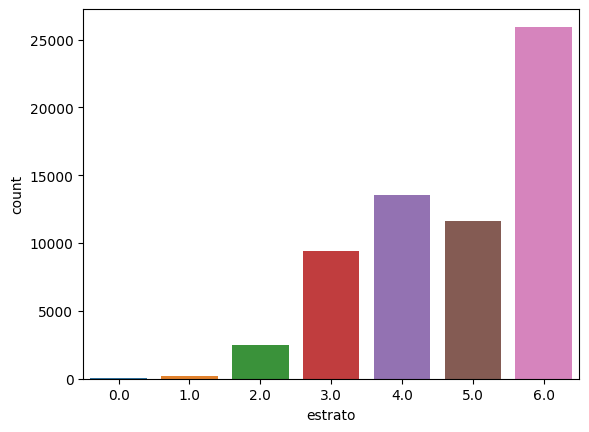

In [30]:
sns.countplot(x = 'estrato', data = apt)

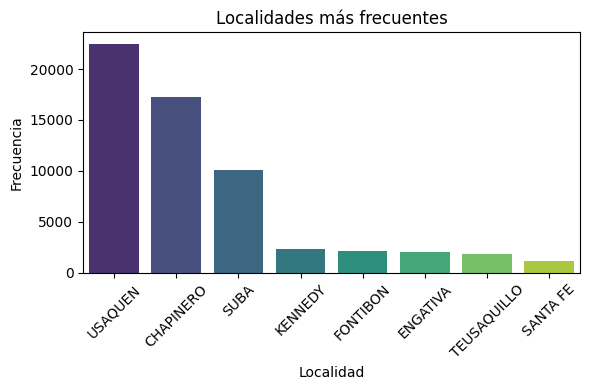

In [31]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['localidad'].value_counts().head(8)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Localidad')
plt.ylabel('Frecuencia')
plt.title('Localidades más frecuentes')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()



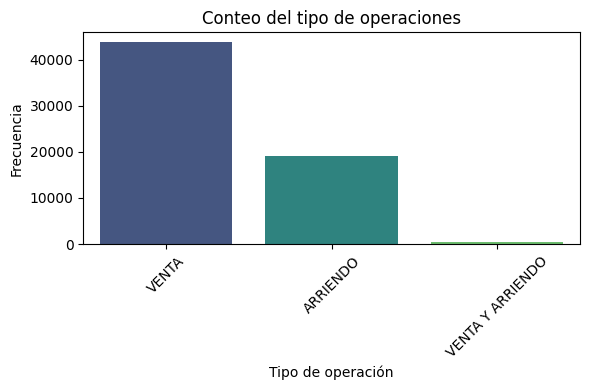

In [32]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['tipo_operacion'].value_counts()

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Tipo de operación')
plt.ylabel('Frecuencia')
plt.title('Conteo del tipo de operaciones')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


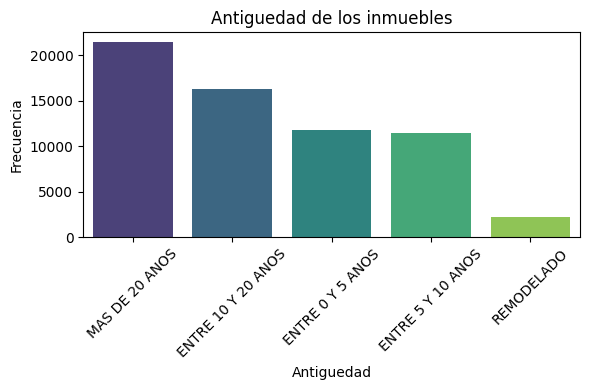

In [33]:
# Contar la frecuencia de cada localidad
localidades_frecuentes = apt['antiguedad'].value_counts().head(8)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=localidades_frecuentes.index, y=localidades_frecuentes.values, palette="viridis")

# Añadir etiquetas y título
plt.xlabel('Antiguedad')
plt.ylabel('Frecuencia')
plt.title('Antiguedad de los inmuebles')

# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

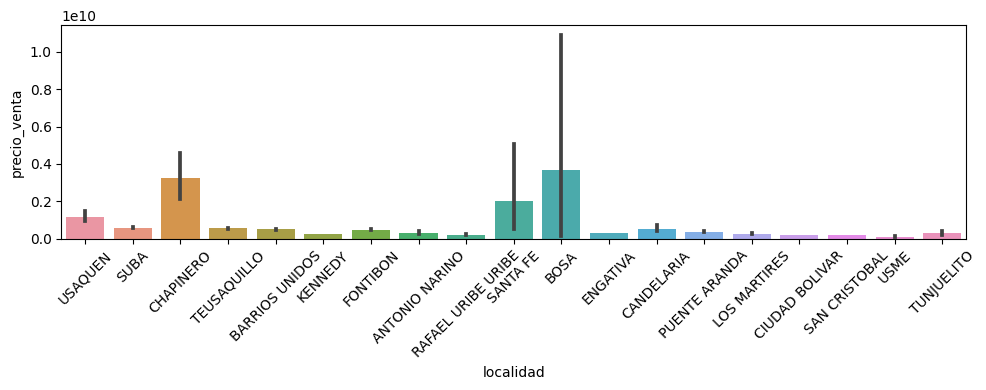

In [34]:
#sns.lmplot(x='localidad', y='precio_venta', data=apt);
plt.figure(figsize=(10, 4))
sns.barplot(x='localidad',
            y='precio_venta',
            data=apt);
# Rotar las etiquetas del eje x para una mejor legibilidad si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

<Axes: xlabel='precio_venta', ylabel='area'>

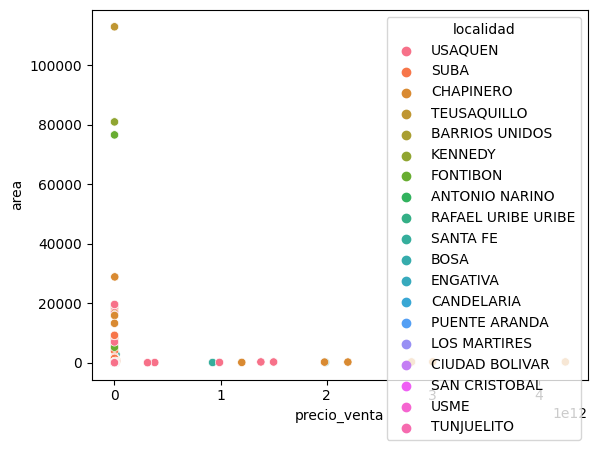

In [35]:
sns.scatterplot(data=apt,
                x='precio_venta',
                y='area',
                hue='localidad',)


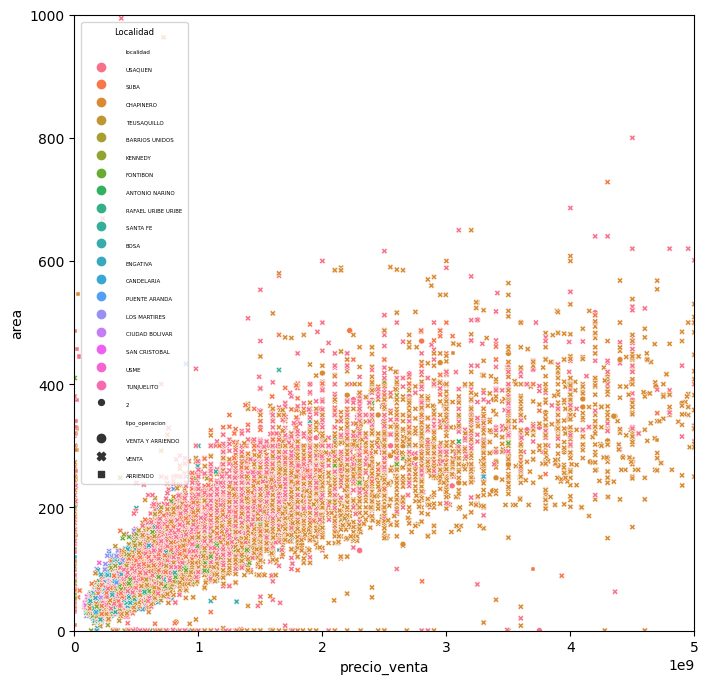

In [36]:
plt.figure(figsize=(8, 8))
fig = sns.scatterplot(data=apt,
                x='precio_venta',
                y='area',
                size=2,
                style='tipo_operacion',
                hue='localidad',)

fig.set_xlim([0, 5000000000])
fig.set_ylim([0, 1000])

legend = plt.legend(title='Localidad')
legend.get_title().set_fontsize(6)
for item in legend.texts:
    item.set_fontsize(4)

## 2.6 Conclusiones

Durante el proceso de comprensión de los datos recopilados, se identificaron contribuciones sustanciales que adquirirán una relevancia significativa en las fases subsiguientes del desarrollo del proyecto. Las aportaciones destacadas se detallan a continuación:
* Las variables numéricas de mayor relevancia para este análisis son el precio de venta o arriendo y el área. En consecuencia, se llevaron a cabo agrupaciones basadas en estas variables numéricas en función de las categorías deseadas.
* Se observa 20 variables que tienen al menos 1 valor nulo. De las cuales 10 de ellas poseen mas de 10.000 valores nulos, estan son: precio_arriendo_anterior, precio_venta_anterior, fecha_actualizacion_precio_arriendo, fecha_actualizacion_precio_venta, precio_arriendo, closets, piso, precio_venta, compañia, administracióñ.
* Se observa gran dispeción de los datos en algunas localidades: Bosa, Santa Fe, Chapinero, Usaquen, Candelaria, Tunjuelito, entre otras.
* Al observar las medidas de dispercíon, podemos ver que algunas localidades cuenta con outliers pues hay algunos predios que llegan a costar hasta 4 billones de pesos.

# 3. Preparación de los datos

## 3.1 Limpieza del conjunto de datos

### 3.1.1 Limpieza de valores nulos

Se limpian las columnas de variables que no son necesarias para el desarrolo del análisis planteado en el proyecto


In [37]:
apt.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'banos', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'descripcion', 'datetime', 'website', 'compañia',
       'fecha_actualizacion_precio_venta', 'precio_venta_anterior',
       'fecha_actualizacion_precio_arriendo', 'precio_arriendo_anterior',
       'jacuzzi', 'piso', 'closets', 'chimenea', 'permite_mascotas',
       'gimnasio', 'ascensor', 'conjunto_cerrado', 'coords_modified',
       'localidad', 'barrio', 'estacion_tm_cercana', 'distancia_estacion_tm_m',
       'is_cerca_estacion_tm'],
      dtype='object')

In [38]:
col_to_clean = ['precio_arriendo_anterior',
                'precio_venta_anterior',
                'fecha_actualizacion_precio_venta',
                'fecha_actualizacion_precio_arriendo',
                'descripcion',
                'datetime',
                'website',
                'compañia',
                'permite_mascotas',
                'estacion_tm_cercana',
                'closets',
                'banos',]

In [39]:
apt_cleaned = (
    apt
    .drop(col_to_clean, axis=1)
)
apt_cleaned.columns

Index(['codigo', 'tipo_propiedad', 'tipo_operacion', 'precio_venta',
       'precio_arriendo', 'area', 'habitaciones', 'administracion',
       'parqueaderos', 'sector', 'estrato', 'antiguedad', 'estado', 'longitud',
       'latitud', 'jacuzzi', 'piso', 'chimenea', 'gimnasio', 'ascensor',
       'conjunto_cerrado', 'coords_modified', 'localidad', 'barrio',
       'distancia_estacion_tm_m', 'is_cerca_estacion_tm'],
      dtype='object')

En este punto, se separa los datos en dos dataframes:
1. Venta
2. Arriendo

In [40]:
df_ventas = (
    apt_cleaned
    .query('tipo_operacion == "VENTA" or tipo_operacion == "VENTA Y ARRIENDO"')
)
df_ventas.isna().sum()

codigo                         0
tipo_propiedad                 0
tipo_operacion                 0
precio_venta                   0
precio_arriendo            43543
area                           1
habitaciones                   2
administracion              4341
parqueaderos                   4
sector                      1871
estrato                       17
antiguedad                    25
estado                      1144
longitud                       0
latitud                        0
jacuzzi                        0
piso                       18020
chimenea                       0
gimnasio                       0
ascensor                       0
conjunto_cerrado               0
coords_modified                0
localidad                      0
barrio                       243
distancia_estacion_tm_m        0
is_cerca_estacion_tm           0
dtype: int64

In [41]:
df_ventas = (
    df_ventas
    .drop(['precio_arriendo',
           'administracion',
           'sector',
           'piso',
           'estado',],
           axis=1)
)
df_ventas.isna().sum()

codigo                       0
tipo_propiedad               0
tipo_operacion               0
precio_venta                 0
area                         1
habitaciones                 2
parqueaderos                 4
estrato                     17
antiguedad                  25
longitud                     0
latitud                      0
jacuzzi                      0
chimenea                     0
gimnasio                     0
ascensor                     0
conjunto_cerrado             0
coords_modified              0
localidad                    0
barrio                     243
distancia_estacion_tm_m      0
is_cerca_estacion_tm         0
dtype: int64

In [42]:
df_ventas = df_ventas.dropna()
df_ventas.isna().sum()

codigo                     0
tipo_propiedad             0
tipo_operacion             0
precio_venta               0
area                       0
habitaciones               0
parqueaderos               0
estrato                    0
antiguedad                 0
longitud                   0
latitud                    0
jacuzzi                    0
chimenea                   0
gimnasio                   0
ascensor                   0
conjunto_cerrado           0
coords_modified            0
localidad                  0
barrio                     0
distancia_estacion_tm_m    0
is_cerca_estacion_tm       0
dtype: int64

In [43]:
df_ventas.shape

(43882, 21)

In [44]:
df_arriendo = (
    apt_cleaned
    .query('tipo_operacion == "ARRIENDO" or tipo_operacion == "VENTA Y ARRIENDO"')
)
df_arriendo.isna().sum()

codigo                         0
tipo_propiedad                 0
tipo_operacion                 0
precio_venta               18840
precio_arriendo                0
area                           1
habitaciones                   6
administracion              7615
parqueaderos                   5
sector                      1136
estrato                        4
antiguedad                     7
estado                         0
longitud                       0
latitud                        0
jacuzzi                        0
piso                       10134
chimenea                       0
gimnasio                       0
ascensor                       0
conjunto_cerrado               0
coords_modified                0
localidad                      0
barrio                        70
distancia_estacion_tm_m        0
is_cerca_estacion_tm           0
dtype: int64

In [45]:
df_arriendo = (
    df_arriendo
    .drop(['precio_venta',
           'administracion',
           'sector',
           'piso',
           'estado',],
           axis=1)
)
df_arriendo.isna().sum()

codigo                      0
tipo_propiedad              0
tipo_operacion              0
precio_arriendo             0
area                        1
habitaciones                6
parqueaderos                5
estrato                     4
antiguedad                  7
longitud                    0
latitud                     0
jacuzzi                     0
chimenea                    0
gimnasio                    0
ascensor                    0
conjunto_cerrado            0
coords_modified             0
localidad                   0
barrio                     70
distancia_estacion_tm_m     0
is_cerca_estacion_tm        0
dtype: int64

In [46]:
df_arriendo = df_arriendo.dropna()
df_arriendo.isna().sum()

codigo                     0
tipo_propiedad             0
tipo_operacion             0
precio_arriendo            0
area                       0
habitaciones               0
parqueaderos               0
estrato                    0
antiguedad                 0
longitud                   0
latitud                    0
jacuzzi                    0
chimenea                   0
gimnasio                   0
ascensor                   0
conjunto_cerrado           0
coords_modified            0
localidad                  0
barrio                     0
distancia_estacion_tm_m    0
is_cerca_estacion_tm       0
dtype: int64

In [47]:
df_arriendo.shape

(19405, 21)

### 3.2.2 Limpieza de outliers:

* Durante el proceso de exploración de datos, se identificaron inmuebles que presentaban valores de área y/o precios (de venta o arriendo) iguales a cero. Es importante destacar que estos valores nulos o cero son inconsistentes en el contexto de bienes raíces, ya que no puede existir un inmueble con área o valor monetario igual a cero. Por consiguiente, se ha llevado a cabo un proceso de limpieza de datos, eliminando aquellos registros que contenían estas discrepancias, con el fin de garantizar la integridad y coherencia de la información analizada.
* Ademas, la información utilizada en este análisis de datos se obtuvo de plataformas web de bienes raíces, donde son los usuarios quienes publican la información sobre propiedades. Dado que los datos provienen de fuentes en línea y son proporcionados por individuos, resulta inevitable que se presenten valores atípicos causados por errores tipográficos. Al examinar la base de datos, se identificaron valores que exceden por varias cifras los precios (tanto para venta y arriendo) en el contexto de Bogotá para el precio de un inmueble. Por ende, es fundamental eliminar estos datos atípicos para garantizar la precisión y fiabilidad del modelo que se está desarrollando
* Tambien, se identificaron errores tipográficos en la información relacionada con el área de los apartamentos. Se encontraron valores que superan los 10.000 metros cuadrados, lo cual resulta altamente improbable y poco realista para el contexto de apartamentos o casas en Bogotá. Como se menciono, estos errores pueden deberse a ingresos incorrectos o malinterpretaciones al momento de registrar la información en las plataformas en línea.

Es imperativo corregir estos datos incoherentes para asegurar que el análisis se base en información precisa y representativa del mercado inmobiliario en la ciudad

In [48]:
df_ventas = (
    df_ventas
    .query('precio_venta < 50000000000 and area < 10000')
)
df_ventas.shape

(43858, 21)

In [49]:
df_arriendo = (
    df_arriendo
    .query('precio_arriendo < 50000000 and area < 10000')
)
df_arriendo.shape

(19327, 21)

Por ultimo, tras esta limpieza se quiere ver cuanto fue el porcentaje de reducción en los registros de los dataframes

In [50]:
# df_ventas
p_r_ventas = (43882 - 43830) / 43882
p_r_ventas * 100

# Fue menos del 1%

0.11849961259742035

In [51]:
# df_arriendo
p_r_arriendo = (19405 - 18857) / 43882
p_r_arriendo * 100

# un poco mas del 1%

1.2488036096805069

## 3.2 Distribución de los datos

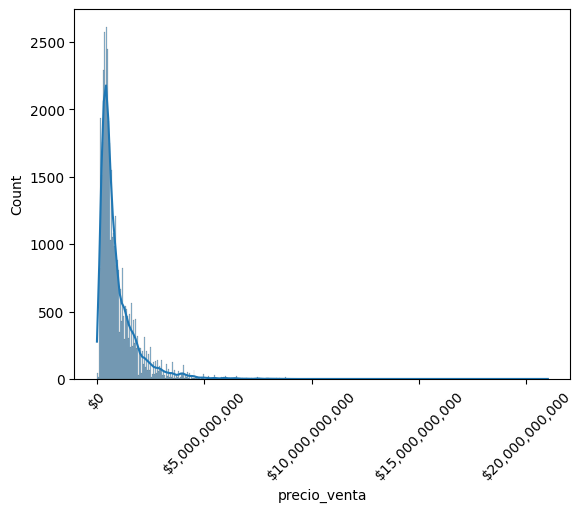

In [52]:
# Gets the histogram
precio = sns.histplot(df_ventas['precio_venta'], kde=True)
# Rotates the x labels
plt.xticks(rotation=45)
# Applies money format
ax = plt.gca()
ax.xaxis.set_major_formatter(lambda x, pos: "${:,.0f}".format(x))


Al examinar el histograma, se evidencia que los datos no se adhieren a una distribución normal. Dado que estamos tratando con activos como propiedades e inmuebles, la distribución de los datos muestra una clara tendencia hacia el principio de la ley del 80/20. Por consiguiente, resulta más apropiado emplear una distribución tipo Pareto o Exponencial para llevar a cabo el análisis correspondiente

In [53]:
# Creamos la muestra de precios de venta
sample = df_ventas.precio_venta.values

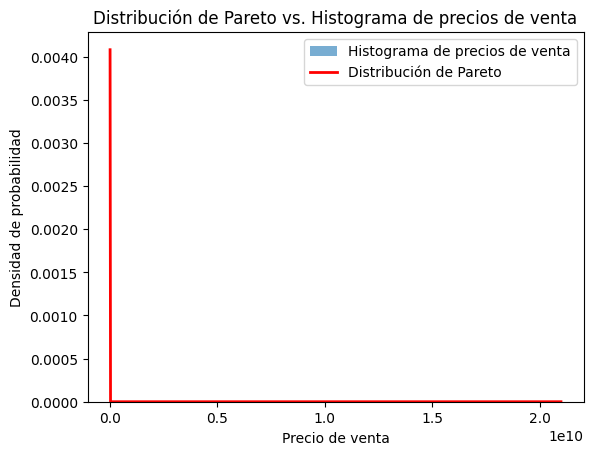

In [54]:
# Ajustamos la distribución de pareto a los datos
dis_ventas = stats.pareto(b = 1000, scale=np.min(sample))

# Generamos puntos en el rango de interés
x = np.linspace(np.min(sample), np.max(sample), 1000)

# Calculamos la función de densidad de probabilidad para cada punto
pdf_ventas = dis_ventas.pdf(x)

# Graficamos la PDF de la distribución de Pareto y el histograma de los datos
plt.hist(sample, bins=30, density=True, alpha=0.6, label='Histograma de precios de venta')
plt.plot(x, pdf_ventas, 'r-', lw=2, label='Distribución de Pareto')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución de Pareto vs. Histograma de precios de venta')
plt.legend()
plt.show()

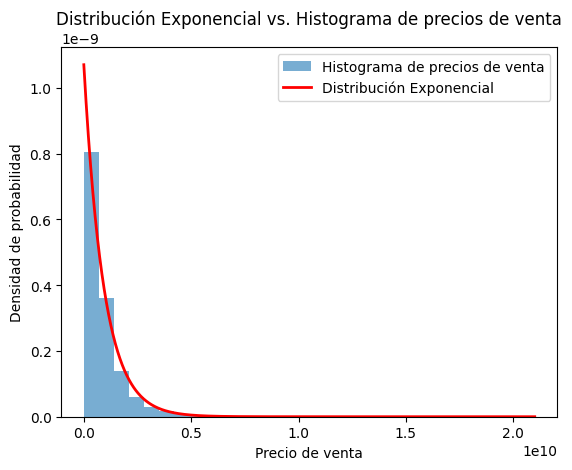

In [55]:
# Ajustamos la distribución exponencial a los datos
loc = np.min(sample)  # Localización, en este caso sería el valor mínimo
scale = np.mean(sample) - loc  # Escala basada en la media

# Generamos puntos en el rango de interés
x = np.linspace(np.min(sample), np.max(sample), 1000)

# Calculamos la función de densidad de probabilidad para cada punto
pdf_ventas = stats.expon.pdf(x, loc=loc, scale=scale)

# Graficamos la PDF de la distribución exponencial y el histograma de los datos
plt.hist(sample, bins=30, density=True, alpha=0.6, label='Histograma de precios de venta')
plt.plot(x, pdf_ventas, 'r-', lw=2, label='Distribución Exponencial')
plt.xlabel('Precio de venta')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Exponencial vs. Histograma de precios de venta')
plt.legend()
plt.show()

In [62]:
ppf_ventas = stats.expon.ppf(x, 0.95, scale=scale)
ppf_ventas

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na

In [56]:
sample = df_arriendo.precio_arriendo

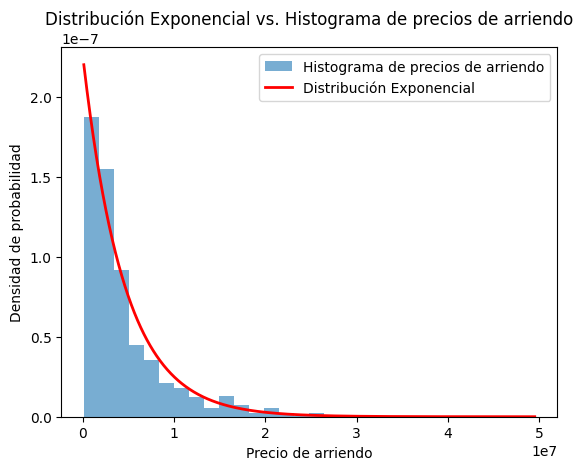

In [57]:
# Ajustamos la distribución exponencial a los datos
loc = np.min(sample)  # Localización, en este caso sería el valor mínimo
scale = np.mean(sample) - loc  # Escala basada en la media

# Generamos puntos en el rango de interés
x = np.linspace(np.min(sample), np.max(sample), 1000)

# Calculamos la función de densidad de probabilidad para cada punto
pdf_ventas = stats.expon.pdf(x, loc=loc, scale=scale)

# Graficamos la PDF de la distribución exponencial y el histograma de los datos
plt.hist(sample, bins=30, density=True, alpha=0.6, label='Histograma de precios de arriendo')
plt.plot(x, pdf_ventas, 'r-', lw=2, label='Distribución Exponencial')
plt.xlabel('Precio de arriendo')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Exponencial vs. Histograma de precios de arriendo')
plt.legend()
plt.show()

Como se puede apreciar en las gráficas anteriores, la distribución que mejor se ajusta a nuestros datos es de naturaleza exponencial.

# 4. Análisis de datos

## 4.1 Intervalos de confianza

In [58]:
a = dis_ventas.ppf(0.05)
b = dis_ventas.ppf(0.95)

a, b

(245012.56717942824, 245735.05487109712)

## 4.2 Correlaciones

In [59]:
(
    df_ventas
    .groupby('localidad')
    .corr()
)

<ipython-input-59-ab46a5d8bf1d>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .corr()


precio_venta      area  habitaciones  \
localidad                                                                      
ANTONIO NARINO precio_venta                 1.000000  0.864911      0.189610   
               area                         0.864911  1.000000      0.493228   
               habitaciones                 0.189610  0.493228      1.000000   
               parqueaderos                 0.572914  0.467571      0.173724   
               estrato                      0.913961  0.705768      0.036308   
...                                              ...       ...           ...   
USME           ascensor                     0.186478 -0.016399     -0.116304   
               conjunto_cerrado             0.172815  0.050599      0.042509   
               coords_modified                   NaN       NaN           NaN   
               distancia_estacion_tm_m     -0.664786 -0.154151     -0.217850   
               is_cerca_estacion_tm              NaN       NaN           NaN   

                                        parqueaderos   estrato  longitud  \
localidad                                                                  
ANTONIO NARINO precio_venta                 0.572914  0.913961  0.314725   
               area                         0.467571  0.705768  0.502495   
               habitaciones                 0.173724  0.036308  0.483321   
               parqueaderos                 1.000000  0.522669  0.106769   
               estrato                      0.522669  1.000000  0.283322   
...                                              ...       ...       ...   
USME           ascensor                     0.127825  0.080520  0.024442   
               conjunto_cerrado             0.406715  0.067340  0.002895   
               coords_modified                   NaN       NaN       NaN   
               distancia_estacion_tm_m     -0.241153 -0.094570 -0.556243   
               is_cerca_estacion_tm              NaN       NaN       NaN   

                                         latitud   jacuzzi  chimenea  \
localidad                                                              
ANTONIO NARINO precio_venta            -0.184431  0.034105  0.484763   
               area                    -0.447784  0.083989  0.355698   
               habitaciones            -0.488431  0.040710 -0.081778   
               parqueaderos             0.016828  0.161256  0.332962   
               estrato                 -0.056007 -0.025482  0.621582   
...                                          ...       ...       ...   
USME           ascensor                 0.089699       NaN       NaN   
               conjunto_cerrado         0.222618       NaN       NaN   
               coords_modified               NaN       NaN       NaN   
               distancia_estacion_tm_m -0.996585       NaN       NaN   
               is_cerca_estacion_tm          NaN       NaN       NaN   

                                        gimnasio  ascensor  conjunto_cerrado  \
localidad                                                                      
ANTONIO NARINO precio_venta             0.350631  0.151513         -0.149341   
               area                     0.227217 -0.056029         -0.217646   
               habitaciones            -0.029356 -0.357587         -0.071361   
               parqueaderos             0.391611  0.092076          0.092809   
               estrato                  0.459390  0.271163         -0.042951   
...                                          ...       ...               ...   
USME           ascensor                 0.269729  1.000000          0.140638   
               conjunto_cerrado         0.056522  0.140638          1.000000   
               coords_modified               NaN       NaN               NaN   
               distancia_estacion_tm_m -0.145510 -0.098864         -0.234672   
               is_cerca_estacion_tm          NaN       NaN               NaN   

                                

In [60]:
df_arriendo.corr()

<ipython-input-60-33f111ee6087>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_arriendo.corr()


,precio_arriendo,area,habitaciones,parqueaderos,estrato,longitud,latitud,jacuzzi,chimenea,gimnasio,ascensor,conjunto_cerrado,coords_modified,distancia_estacion_tm_m,is_cerca_estacion_tm
precio_arriendo,1.000000,0.678079,0.459040,0.741921,0.550834,0.358830,0.005163,0.230551,0.374971,0.233463,0.146675,0.069055,0.033313,0.139172,-0.177090
area,0.678079,1.000000,0.501726,0.591332,0.397504,0.253016,0.044925,0.201173,0.320878,0.114547,0.076445,0.040472,0.014795,0.134768,-0.149163
habitaciones,0.459040,0.501726,1.000000,0.460823,0.159169,0.001612,0.130551,0.139582,0.264901,0.038530,-0.021676,0.065868,0.000742,0.198892,-0.184818
parqueaderos,0.741921,0.591332,0.460823,1.000000,0.691830,0.491857,0.177849,0.196274,0.440383,0.240657,0.238171,0.122027,0.025905,0.103979,-0.192356
estrato,0.550834,0.397504,0.159169,0.691830,1.000000,0.647418,0.205551,0.105324,0.429144,0.175838,0.295766,0.064982,0.032785,0.030806,-0.176094
longitud,0.358830,0.253016,0.001612,0.491857,0.647418,1.000000,0.445548,0.086000,0.289324,0.149274,0.245204,0.091741,0.035606,-0.008221,-0.094570
latitud,0.005163,0.044925,0.130551,0.177849,0.205551,0.445548,1.000000,0.013481,0.093540,0.071986,0.098158,0.130508,-0.008208,0.249401,-0.220097
jacuzzi,0.230551,0.201173,0.139582,0.196274,0.105324,0.086000,0.013481,1.000000,0.143418,0.131638,0.076575,0.083843,0.010463,0.061914,-0.045725
chimenea,0.374971,0.320878,0.264901,0.440383,0.429144,0.289324,0.093540,0.143418,1.000000,0.142909,0.266839,0.083217,0.020261,0.081580,-0.126030
gimnasio,0.233463,0.114547,0.038530,0.240657,0.175838,0.149274,0.071986,0.131638,0.142909,1.000000,0.256443,0.210480,0.008734,0.055386,-0.044422
